In [1]:
# Import general packages
import sys
sys.path.append("..") 
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Data')

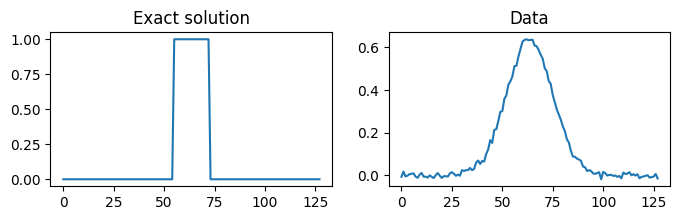

In [2]:
from cuqi.testproblem import Deconvolution1D

# Load problem
n = 128
A, y_data, info = Deconvolution1D.get_components(dim=n, phantom='square')

plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.plot(info.exactSolution)
plt.title("Exact solution")

plt.subplot(1,2,2)
plt.plot(y_data)
plt.title("Data")

Computing 1000 samples
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is experimental. !!!
!!!    Always validate the computed results.     !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using Regularized LinearRTO sampler.
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 28.519967079162598
Plotting results


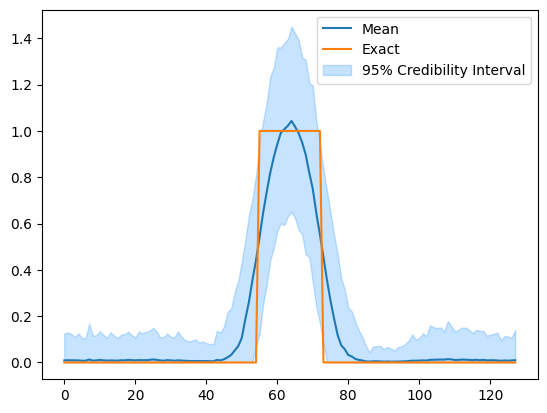

In [3]:
from cuqi.distribution import Gaussian, ImplicitRegularizedGaussian
from cuqi.problem import BayesianProblem

# Minimal example
x  = ImplicitRegularizedGaussian(Gaussian(0.5*np.ones(n), 0.1), constraint = "nonnegative")
y  = Gaussian(A@x, 0.001)
BP = BayesianProblem(y, x).set_data(y=y_data)
BP.UQ(exact=info.exactSolution)

Sample 600 / 600


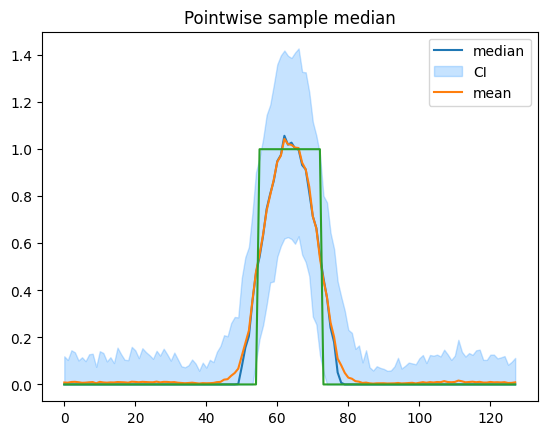

In [4]:
from cuqi.sampler import RegularizedLinearRTO

x  = ImplicitRegularizedGaussian(Gaussian(0.5*np.ones(n), 0.1), constraint = "nonnegative")
y  = Gaussian(A@x, 0.001)

BP = BayesianProblem(y, x).set_data(y=y_data)
posterior = BP.posterior

sampler = RegularizedLinearRTO(posterior, maxit=100, stepsize = 5e-4, abstol=1e-10)
samples = sampler.sample(500, 100)

plt.figure()
samples.plot_median()
samples.plot_ci()
plt.plot(info.exactSolution)
plt.legend(["median", "CI", "mean", "truth"])
plt.show()

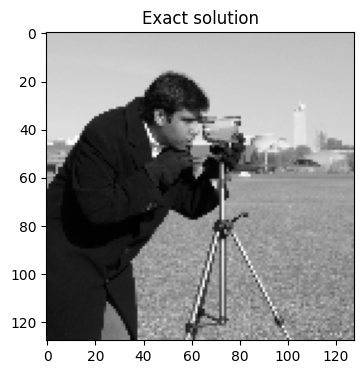

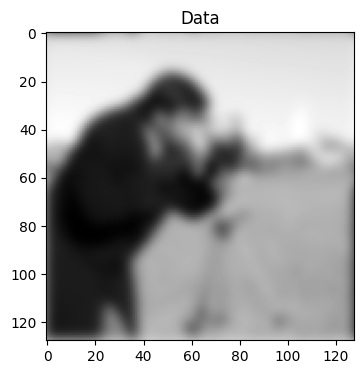

In [11]:
from cuqi.testproblem import Deconvolution2D

n = 128
A, y_data, info = Deconvolution2D.get_components(dim=n, phantom='camera')

plt.figure(figsize = (4,4))
info.exactSolution.plot()
plt.title("Exact solution")
plt.show()

plt.figure(figsize = (4,4))
y_data.plot()
plt.title("Data")
plt.show()

In [ ]:
from cuqi.sampler import RegularizedLinearRTO

x  = ImplicitRegularizedGaussian(Gaussian(0.5*np.ones(n), 0.1), constraint = "nonnegative")
y  = Gaussian(A@x, 0.001)

BP = BayesianProblem(y, x).set_data(y=y_data)
posterior = BP.posterior

sampler = RegularizedLinearRTO(posterior, maxit=100, stepsize = 5e-4, abstol=1e-10)
samples = sampler.sample(500, 100)

plt.figure()
samples.plot_median()
samples.plot_ci()
plt.plot(info.exactSolution)
plt.legend(["median", "CI", "mean", "truth"])
plt.show()